In [6]:
df_train, df_val, df_test, y_train, y_val, y_test = preprocess_data(df, target_col='jamb_score', random_state=1)

In [7]:
df_train

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,Public,Urban,No,Yes,Medium,Low,21,Female,Low,0,3
1,11,80,2,3.3,Public,Urban,Yes,Yes,Medium,High,22,Female,Medium,Secondary,1
2,31,82,1,8.3,Public,Urban,Yes,Yes,Low,High,19,Female,High,Tertiary,2
3,29,79,1,15.8,Public,Rural,Yes,Yes,Low,Low,19,Male,Low,Primary,2
4,28,96,2,8.9,Private,Rural,Yes,Yes,Medium,Low,19,Male,High,Secondary,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,79,3,12.2,Public,Urban,No,No,Low,High,17,Male,High,Secondary,1
2996,3,87,1,9.6,Public,Urban,No,No,Medium,Medium,17,Male,Medium,Primary,1
2997,17,96,4,13.7,Private,Urban,No,Yes,High,Medium,16,Male,Medium,Primary,2
2998,25,74,2,3.4,Public,Rural,No,No,High,High,21,Male,Low,Secondary,1


In [8]:
from sklearn.feature_extraction import DictVectorizer

def transform_data(df_train, df_val):
    """
    Transform the training and validation data using DictVectorizer.

    Parameters:
    df_train (pd.DataFrame): The training set.
    df_val (pd.DataFrame): The validation set.

    Returns:
    tuple: A tuple containing:
        - dv (DictVectorizer): The fitted DictVectorizer.
        - X_train (csr_matrix): The transformed training set.
        - X_val (csr_matrix): The transformed validation set.
    """
    dv = DictVectorizer(sparse=True)
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))
    X_val = dv.transform(df_val.to_dict(orient='records'))
    
    return dv, X_train, X_val


## Models

In [9]:
# requires:  from sklearn.tree import DecisionTreeRegressor

def train_model(X_train, y_train, max_depth=None):
    """
    Train a Decision Tree Regressor on the training data.

    Parameters:
    X_train (csr_matrix): The transformed training set.
    y_train (pd.Series): The target values for the training set.
    max_depth (int or None): The maximum depth of the decision tree. Default is None.

    Returns:
    model (DecisionTreeRegressor): The trained model.
    """
    model = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
    model.fit(X_train, y_train)
    
    return model

In [10]:
# requires:   from sklearn.ensemble import RandomForestRegressor

def train_random_forest(X_train, y_train, n_jobs=-1, n_estimators=10, random_state=1):
    """
    Train a RandomForestRegressor on the training data.

    Parameters:
    X_train (csr_matrix): The transformed training set.
    y_train (pd.Series): The target values for the training set.
    n_jobs (int): The number of jobs to run in parallel. Default is -1 (use all processors).
    n_estimators (int): The number of trees in the forest. Default is 10.
    random_state (int): The seed used by the random number generator. Default is 1.

    Returns:
    model (RandomForestRegressor): The trained model.
    """
    model = RandomForestRegressor(n_jobs=n_jobs, n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    
    return model


# Putting it together

In [11]:
df_train, df_val, df_test, y_train, y_val, y_test = preprocess_data(df, target_col='jamb_score', random_state=1)

dv, X_train, X_val = transform_data(df_train, df_val)
model = train_model(X_train, y_train, max_depth=5)
y_pred = model.predict(X_val)

#print("Predictions:", y_pred)

## Question 1

Let's train a decision tree regressor to predict the jamb_score variable.

    Train a model with max_depth=1.

Which feature is used for splitting the data?

    study_hours_per_week
    attendance_rate
    teacher_quality
    distance_to_school

In [12]:
# Get feature names from DictVectorizer
feature_names = dv.feature_names_
feature_importances = model.feature_importances_

# Create a DataFrame for better readability
feature_score_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_importances
}).sort_values(by='Score', ascending=False)


**study_hours_per_week** 0.499212. -- About what you'd expect \
teacher_quality  0.187736 \
attendance_rate  0.156141 \
socioeconomic_status=High  0.046446 

In [13]:
# X, y = make_regression(n_features=4, n_informative=2,
#                        random_state=0, shuffle=False)
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(X, y)
# print(regr.predict([[0, 0, 0, 0]]))

## Question 2

Train a random forest model with these parameters:
 - n_estimators=10 <br>
 - random_state= <br>
 - n_jobs=-1 (optional - to make training faster) <br>

In [14]:
# Random forest
model_rf = train_random_forest(X_train, y_train, n_jobs=-1, n_estimators=10, random_state=1)
y_pred_rf = model_rf.predict(X_val)

# print("Random Forest Predictions:", y_pred_rf)

What's the RMSE of this model on validation?


In [15]:
# Validation on the validation set
y_pred_val = model_rf.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f'RMSE for validation set alone: {rmse_val:.3f}')

RMSE for validation set alone: 42.137


But if they need to be combined ...

In [16]:
# Make predictions on training and validation sets
y_pred_train = model_rf.predict(X_train)
y_pred_val = model_rf.predict(X_val)

# Concatenate predictions and true values
y_true_combined = np.concatenate([y_train, y_val])
y_pred_combined = np.concatenate([y_pred_train, y_pred_val])

# Calculate combined RMSE
rmse_combined = np.sqrt(mean_squared_error(y_true_combined, y_pred_combined))
print(f'Combined Train and Validation RMSE: {rmse_combined:.3f}')

Combined Train and Validation RMSE: 26.100


22.1 </br>
**42.13** </br>
62.13 </br>
82.12 </br>

### Anyway, the question was on the validation dataset and not a combined set so I'm goin with 42.13

## Question 3

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10.
    Set random_state to 1.
    Evaluate the model on the validation dataset.

In [17]:
# Store RMSE values for each n_estimators
rmse_results = []

for i in range(10, 201, 10):
    # Train RandomForest Regressor with current n_estimators
    model_rf = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    model_rf.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred_val = model_rf.predict(X_val)
    
    # Calculate and store RMSE using root_mean_squared_error
    rmse_val = root_mean_squared_error(y_val, y_pred_val)
    rmse_results.append((i, rmse_val))

    print(f'RMSE for {i} trees using the validation set: {rmse_val:.3f}')

# Display RMSE results
rmse_df = pd.DataFrame(rmse_results, columns=['n_estimators', 'RMSE'])


RMSE for 10 trees using the validation set: 42.137
RMSE for 20 trees using the validation set: 41.461
RMSE for 30 trees using the validation set: 41.106
RMSE for 40 trees using the validation set: 40.917
RMSE for 50 trees using the validation set: 40.852
RMSE for 60 trees using the validation set: 40.784
RMSE for 70 trees using the validation set: 40.677
RMSE for 80 trees using the validation set: 40.539
RMSE for 90 trees using the validation set: 40.504
RMSE for 100 trees using the validation set: 40.517
RMSE for 110 trees using the validation set: 40.593
RMSE for 120 trees using the validation set: 40.625
RMSE for 130 trees using the validation set: 40.651
RMSE for 140 trees using the validation set: 40.595
RMSE for 150 trees using the validation set: 40.597
RMSE for 160 trees using the validation set: 40.604
RMSE for 170 trees using the validation set: 40.628
RMSE for 180 trees using the validation set: 40.641
RMSE for 190 trees using the validation set: 40.631
RMSE for 200 trees us

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

10 </br>
25</br>
**80**  </br>
200 </br>

## Question 4

Let's select the best max_depth:

 - Try different values of max_depth: [10, 15, 20, 25]
 - For each of these values,
     - try different values of n_estimators from 10 till 200 (with step 10)
     - calculate the mean RMSE
 - Fix the random seed: random_state=1

In [18]:
# Store RMSE values for each n_estimators
rmse_results = []

for i in range(10, 201, 10):
    for j in range(10, 26, 5):
        # Train RandomForest Regressor with current n_estimators
        model_rf = RandomForestRegressor(n_estimators=i, max_depth=j, random_state=1, n_jobs=-1)
        model_rf.fit(X_train, y_train)
        
        # Make predictions on the validation set
        y_pred_val = model_rf.predict(X_val)
        
        # Calculate and store RMSE using root_mean_squared_error
        rmse_val = root_mean_squared_error(y_val, y_pred_val)
        rmse_results.append((i, j, rmse_val))
    
        print(f'RMSE for {i} trees with depth {j} using the validation set: {rmse_val:.3f}')
        

# Display RMSE results
rmse_df = pd.DataFrame(rmse_results, columns=['n_estimators', 'max_depth','RMSE'])
print(f'The smallest RMSE is {min(rmse_results)} ')


RMSE for 10 trees with depth 10 using the validation set: 41.258
RMSE for 10 trees with depth 15 using the validation set: 42.004
RMSE for 10 trees with depth 20 using the validation set: 42.025
RMSE for 10 trees with depth 25 using the validation set: 42.160
RMSE for 20 trees with depth 10 using the validation set: 40.881
RMSE for 20 trees with depth 15 using the validation set: 41.456
RMSE for 20 trees with depth 20 using the validation set: 41.389
RMSE for 20 trees with depth 25 using the validation set: 41.471
RMSE for 30 trees with depth 10 using the validation set: 40.625
RMSE for 30 trees with depth 15 using the validation set: 41.168
RMSE for 30 trees with depth 20 using the validation set: 41.116
RMSE for 30 trees with depth 25 using the validation set: 41.125
RMSE for 40 trees with depth 10 using the validation set: 40.270
RMSE for 40 trees with depth 15 using the validation set: 40.931
RMSE for 40 trees with depth 20 using the validation set: 40.847
RMSE for 40 trees with de

In [19]:
# Convert RMSE results to DataFrame
rmse_df = pd.DataFrame(rmse_results, columns=['n_estimators', 'max_depth', 'RMSE'])

# Find the parameters with the lowest RMSE
best_params = rmse_df.loc[rmse_df['RMSE'].idxmin()]
print(f'Best parameters: n_estimators={best_params["n_estimators"]}, max_depth={best_params["max_depth"]}')
print(f'Lowest RMSE: {best_params["RMSE"]:.3f}')

Best parameters: n_estimators=90.0, max_depth=10.0
Lowest RMSE: 40.174


### Let's plot it just to check.

/var/folders/_3/9_qsgmm55yg0k3k8tgh0gy3w0000gn/T/ipykernel_23985/3662695714.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.figure.show()


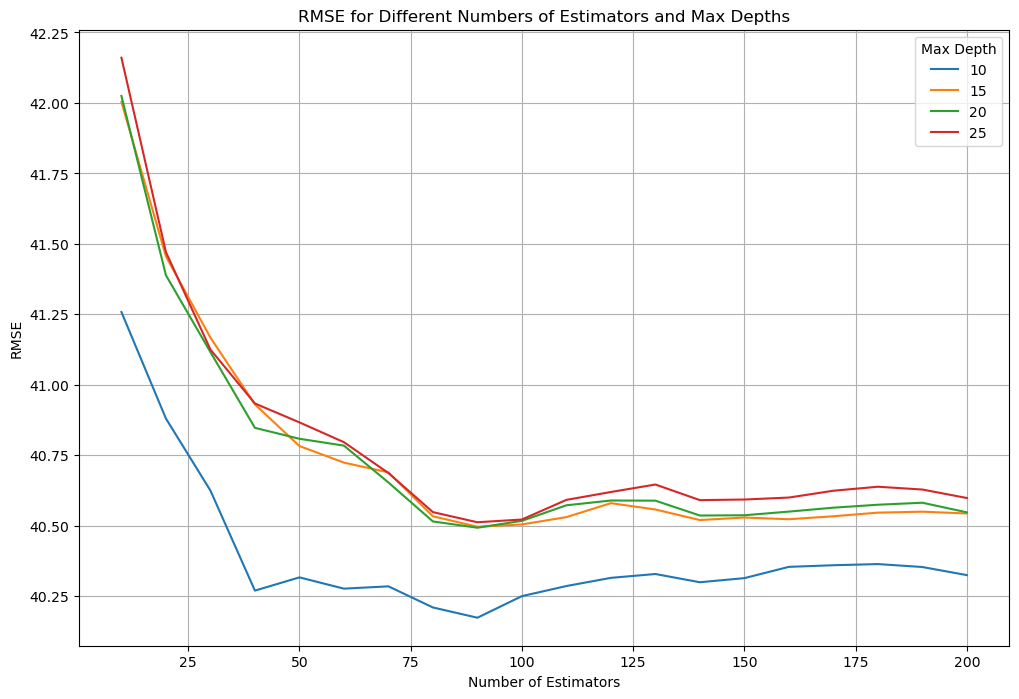

In [20]:
# Convert RMSE results to DataFrame
rmse_df = pd.DataFrame(rmse_results, columns=['n_estimators', 'max_depth', 'RMSE'])

# Plotting the results using pandas' internal plotting capabilities
plot = rmse_df.pivot(index='n_estimators', columns='max_depth', values='RMSE').plot(
    figsize=(12, 8),
    title='RMSE for Different Numbers of Estimators and Max Depths'
)
plot.set_xlabel('Number of Estimators')
plot.set_ylabel('RMSE')
plot.legend(title='Max Depth')
plot.grid(True)

# Display the plot
plot.figure.show()

What's the best max_depth, using the mean RMSE?

**10**
15
20
25

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1 (optional)
Get the feature importance information from this model

In [21]:
model_rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model_rf.fit(X_train, y_train)
y_pred_val = model_rf.predict(X_val)

#rmse_val = root_mean_squared_error(y_val, y_pred_val)

In [22]:
# Extract feature importances
feature_importances = model_rf.feature_importances_
feature_names = dv.get_feature_names_out()

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the most important feature
print(importance_df)

                             Feature  Importance
27              study_hours_per_week    0.248354
4                    attendance_rate    0.149729
5                 distance_to_school    0.136486
28                   teacher_quality    0.082682
2                                age    0.069311
3              assignments_completed    0.031517
24         socioeconomic_status=High    0.025714
17           parent_involvement=High    0.022919
10                 it_knowledge=High    0.017719
15  parent_education_level=Secondary    0.016957
14    parent_education_level=Primary    0.015450
16   parent_education_level=Tertiary    0.014489
6                 extra_tutorials=No    0.013459
18            parent_involvement=Low    0.013358
11                  it_knowledge=Low    0.012404
0    access_to_learning_materials=No    0.012325
19         parent_involvement=Medium    0.011492
25          socioeconomic_status=Low    0.010708
26       socioeconomic_status=Medium    0.010563
9                   

What's the most important feature (among these 4)?

 - **study_hours_per_week** In line with the 1<sup>st</sup> so not a suprise.
 - attendance_rate
 - distance_to_school
 - teacher_quality

Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

 - Install XGBoost
 - Create DMatrix for train and validation
 - Create a watchlist
 - Train a model with these parameters for 100 rounds:

In [ ]:
 xgb.XGBRegressor(objective="reg:squarederror", missing=1, seed=42)

In [27]:
# Create DMatrix for train and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Parameters for XGBoost model
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'eval')]

# Train the model with specified parameters for 100 rounds
model_xgb = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100, evals=watchlist)


[0]	train-rmse:42.69384	eval-rmse:44.89114
[1]	train-rmse:39.83326	eval-rmse:43.07010
[2]	train-rmse:37.94542	eval-rmse:42.00332
[3]	train-rmse:36.56125	eval-rmse:41.46452
[4]	train-rmse:35.44252	eval-rmse:40.88896
[5]	train-rmse:34.57756	eval-rmse:40.69096
[6]	train-rmse:33.84230	eval-rmse:40.59315
[7]	train-rmse:33.25929	eval-rmse:40.47993
[8]	train-rmse:32.79415	eval-rmse:40.45326
[9]	train-rmse:32.16019	eval-rmse:40.43929
[10]	train-rmse:31.63404	eval-rmse:40.48319
[11]	train-rmse:31.17673	eval-rmse:40.68201
[12]	train-rmse:30.87313	eval-rmse:40.63522
[13]	train-rmse:30.30310	eval-rmse:40.70983
[14]	train-rmse:30.00098	eval-rmse:40.78133
[15]	train-rmse:29.41497	eval-rmse:40.86107
[16]	train-rmse:29.25816	eval-rmse:40.96580
[17]	train-rmse:28.59378	eval-rmse:41.12190
[18]	train-rmse:28.27990	eval-rmse:41.14360
[19]	train-rmse:27.94572	eval-rmse:41.22835
[20]	train-rmse:27.49658	eval-rmse:41.27921
[21]	train-rmse:27.25449	eval-rmse:41.32427
[22]	train-rmse:27.06652	eval-rmse:41.4188

## Now change eta from 0.3 to 0.1.

In [28]:
# Create DMatrix for train and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Parameters for XGBoost model
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'eval')]

# Train the model with specified parameters for 100 rounds
model_xgb = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100, evals=watchlist)

[0]	train-rmse:45.49999	eval-rmse:47.00533
[1]	train-rmse:44.12948	eval-rmse:45.92344
[2]	train-rmse:42.94858	eval-rmse:44.98366
[3]	train-rmse:41.90896	eval-rmse:44.25755
[4]	train-rmse:40.96728	eval-rmse:43.57339
[5]	train-rmse:40.17514	eval-rmse:43.11181
[6]	train-rmse:39.40436	eval-rmse:42.61054
[7]	train-rmse:38.71199	eval-rmse:42.18883
[8]	train-rmse:38.08081	eval-rmse:41.86754
[9]	train-rmse:37.57559	eval-rmse:41.64338
[10]	train-rmse:37.07490	eval-rmse:41.39235
[11]	train-rmse:36.58709	eval-rmse:41.14265
[12]	train-rmse:36.14574	eval-rmse:40.95201
[13]	train-rmse:35.76896	eval-rmse:40.81778
[14]	train-rmse:35.40802	eval-rmse:40.75008
[15]	train-rmse:35.08521	eval-rmse:40.61341
[16]	train-rmse:34.74187	eval-rmse:40.51800
[17]	train-rmse:34.43969	eval-rmse:40.41659
[18]	train-rmse:34.16132	eval-rmse:40.33546
[19]	train-rmse:33.91836	eval-rmse:40.25632
[20]	train-rmse:33.67389	eval-rmse:40.25010
[21]	train-rmse:33.45853	eval-rmse:40.19826
[22]	train-rmse:33.23371	eval-rmse:40.2110

In [ ]:
Which eta leads to the best RMSE score on the validation dataset?

 - 0.3
 - **0.1**
 - Both give equal value